<a href="https://colab.research.google.com/github/HimanshuSahoo/DATA-SCIENCE/blob/main/Abusive_Non_Abusive_Mail_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##!pip install fastText

In [ ]:
## pip install contractions==0.0.18

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk
import string
##import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
##!pip install textblob

In [ ]:
from textblob import TextBlob
import collections

### Loading and Analyzing data

In [ ]:
data = pd.read_csv("emails1")
data

,Unnamed: 0,filename,Message-ID,content,Class
0,0,arnold-j/_sent_mail/34.,<15267340.1075857594923.JavaMail.evans@thyme>,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive
1,1,arnold-j/_sent_mail/517.,<15539583.1075857652152.JavaMail.evans@thyme>,fuck you,Abusive
2,2,arnold-j/_sent_mail/743.,<4339799.1075857657711.JavaMail.evans@thyme>,Gentlemen:\nThe following champagne is available at 70% of approximate retail price. Also \nhave...,Abusive
3,3,arnold-j/_sent_mail/766.,<25574783.1075857658215.JavaMail.evans@thyme>,sorry i've taken so long...just been trying to fend off the chicks. life is \nsooooo hard some...,Abusive
4,4,arnold-j/_sent_mail/797.,<19506151.1075857658895.JavaMail.evans@thyme>,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23/2000 10:51 AM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive
...,...,...,...,...,...
48071,48071,campbell-l/notes_inbox/133.,<6503484.1075857876489.JavaMail.evans@thyme>,"Dear Market Participants,\n\nPlease note the changes below are planned for the indicated\nOASIS/...",Non Abusive
48072,48072,campbell-l/notes_inbox/134.,<17277180.1075857876513.JavaMail.evans@thyme>,"According to my fancy ciphering we made $310,037.50 for the month of \nNovember. This figure do...",Non Abusive
48073,48073,campbell-l/notes_inbox/135.,<31066400.1075857876537.JavaMail.evans@thyme>,"BUSINESS HIGHLIGHTS\n\nWeather Group\n\nLet=01,s give a big round of applause to the Weather Tea...",Non Abusive
48074,48074,campbell-l/notes_inbox/136.,<26024436.1075857876659.JavaMail.evans@thyme>,Welcome to: DIAMONDS NEWSLETTER Issue: 2000-12\n*********SPECIAL HOLIDAY EDITION********...,Non Abusive


In [ ]:
# Data structure
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.shape

(48076, 5)

In [ ]:
data.dtypes

Unnamed: 0     int64
filename      object
Message-ID    object
content       object
Class         object
dtype: object

In [ ]:
# Drop unnecessary columns
data.drop(columns=['Unnamed: 0','filename','Message-ID'], inplace=True)

In [ ]:
data.head()

,content,Class
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive
1,fuck you,Abusive
2,Gentlemen:\nThe following champagne is available at 70% of approximate retail price. Also \nhave...,Abusive
3,sorry i've taken so long...just been trying to fend off the chicks. life is \nsooooo hard some...,Abusive
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23/2000 10:51 AM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive


In [ ]:
abusive = data[data["Class"]=="Abusive"]
abusive.shape

(3410, 2)

In [ ]:
non_abusive = data[data["Class"]=="Non Abusive"]
non_abusive.shape

(44666, 2)

In [ ]:
# Check for missing values
data.isnull().sum()

content    0
Class      0
dtype: int64

In [ ]:
# Check for duplicated values
data.duplicated().sum()

23420

In [ ]:
# Dropping the duplicates
data = data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(24656, 2)

In [ ]:
data['Class'].value_counts()

Non Abusive    23014
Abusive         1642
Name: Class, dtype: int64

### EDA

#### Text Preprocessing

#### Expanding Contractions

In [ ]:
data['no_contract'] = data['content'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [ ]:
data['content_str'] = [' '.join(map(str, l)) for l in data['no_contract']]
data[['content','content_str']].head()

,content,content_str
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...
1,fuck you,fuck you
2,Gentlemen:\nThe following champagne is available at 70% of approximate retail price. Also \nhave...,Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...
3,sorry i've taken so long...just been trying to fend off the chicks. life is \nsooooo hard some...,sorry i've taken so long...just been trying to fend off the chicks. life is sooooo hard sometime...
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23/2000 10:51 AM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...


#### Removing Punctuations

In [ ]:
data['no_punc'] = data['content_str'].str.replace('[^\w\s]','')
data.iloc[:,2:].head()

<ipython-input-27-f8fd646005bf>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['no_punc'] = data['content_str'].str.replace('[^\w\s]','')


,no_contract,content_str,no_punc
0,"[eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...",eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...
1,"[fuck, you]",fuck you,fuck you
2,"[Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...",Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...
3,"[sorry, i've, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soooo...",sorry i've taken so long...just been trying to fend off the chicks. life is sooooo hard sometime...,sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes MON...
4,"[asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...",asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...


#### Tokenization

In [ ]:
data['tokenized'] = data['no_punc'].apply(word_tokenize)
data.iloc[:,2:].head()

,no_contract,content_str,no_punc,tokenized
0,"[eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...",eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,..."
1,"[fuck, you]",fuck you,fuck you,"[fuck, you]"
2,"[Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...",Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al..."
3,"[sorry, i've, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soooo...",sorry i've taken so long...just been trying to fend off the chicks. life is sooooo hard sometime...,sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes MON...,"[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha..."
4,"[asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...",asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j..."


#### Converting all Characters to Lowercase

In [ ]:
data['lower'] = data['tokenized'].apply(lambda x: [word.lower() for word in x])
data.iloc[:,2:].head()

,no_contract,content_str,no_punc,tokenized,lower
0,"[eat, shit, John, J, Lavorato@excelr, 11/18/2000, 01:01, PM, To:, John, Arnold/HOU/ECT@ECT, cc:,...",eat shit John J Lavorato@excelr 11/18/2000 01:01 PM To: John Arnold/HOU/ECT@ECT cc: Subject: Foo...,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,..."
1,"[fuck, you]",fuck you,fuck you,"[fuck, you]","[fuck, you]"
2,"[Gentlemen:, The, following, champagne, is, available, at, 70%, of, approximate, retail, price.,...",Gentlemen: The following champagne is available at 70% of approximate retail price. Also have in...,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al..."
3,"[sorry, i've, taken, so, long...just, been, trying, to, fend, off, the, chicks., life, is, soooo...",sorry i've taken so long...just been trying to fend off the chicks. life is sooooo hard sometime...,sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes MON...,"[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...","[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha..."
4,"[asshole, John, J, Lavorato@excelr, 12/23/2000, 10:51, AM, To:, John, Arnold/HOU/ECT@ECT, cc:, S...",asshole John J Lavorato@excelr 12/23/2000 10:51 AM To: John Arnold/HOU/ECT@ECT cc: Subject: john...,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j..."


#### Number of stopwords

In [ ]:
stop = stopwords.words('english')

data['stopwords'] = data['content_str'].apply(lambda x: len([x for x in x.split() if x in stop]))
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1
1,fuck you,"[fuck, you]","[fuck, you]",1
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11
3,sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes MON...,"[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...","[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...",23
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2


#### Removing Stopwords

In [ ]:
stop_words = set(stopwords.words('english'))
data['stopwords_removed'] = data['lower'].apply(lambda x: [word for word in x if word not in stop_words])
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords,stopwords_removed
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1,"[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo..."
1,fuck you,"[fuck, you]","[fuck, you]",1,[fuck]
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11,"[gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra..."
3,sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes MON...,"[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...","[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...",23,"[sorry, ive, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian..."
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2,"[asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see..."


#### Number of words

In [ ]:
#Number of Words in single email
data['word_count'] = data['stopwords_removed'].apply(lambda x: len(str(x).split(" ")))
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords,stopwords_removed,word_count
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1,"[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...",35
1,fuck you,"[fuck, you]","[fuck, you]",1,[fuck],1
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11,"[gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...",77
3,sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes MON...,"[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...","[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...",23,"[sorry, ive, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian...",40
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2,"[asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...",27


#### Number of Characters

In [ ]:
#Number of characters in single email 
data['char_count'] = data['no_punc'].str.len() 
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords,stopwords_removed,word_count,char_count
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1,"[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...",35,182
1,fuck you,"[fuck, you]","[fuck, you]",1,[fuck],1,8
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11,"[gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...",77,545
3,sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes MON...,"[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...","[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...",23,"[sorry, ive, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian...",40,384
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2,"[asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...",27,175


#### Stemming

In [ ]:
data['stp_rem_str'] = [' '.join(map(str, l)) for l in data['stopwords_removed']]

In [ ]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['stemmi']=data['stp_rem_str'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [ ]:
data.iloc[:,4:].head()

,no_punc,tokenized,lower,stopwords,stopwords_removed,word_count,char_count,stp_rem_str,stemmi
0,eat shit John J Lavoratoexcelr 11182000 0101 PM To John ArnoldHOUECTECT cc Subject Football bets...,"[eat, shit, John, J, Lavoratoexcelr, 11182000, 0101, PM, To, John, ArnoldHOUECTECT, cc, Subject,...","[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, to, john, arnoldhouectect, cc, subject,...",1,"[eat, shit, john, j, lavoratoexcelr, 11182000, 0101, pm, john, arnoldhouectect, cc, subject, foo...",35,182,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject football bets 20...,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...
1,fuck you,"[fuck, you]","[fuck, you]",1,[fuck],1,8,fuck,fuck
2,Gentlemen The following champagne is available at 70 of approximate retail price Also have inter...,"[Gentlemen, The, following, champagne, is, available, at, 70, of, approximate, retail, price, Al...","[gentlemen, the, following, champagne, is, available, at, 70, of, approximate, retail, price, al...",11,"[gentlemen, following, champagne, available, 70, approximate, retail, price, also, interest, tra...",77,545,gentlemen following champagne available 70 approximate retail price also interest trading red wi...,gentlemen follow champagn avail 70 approxim retail price also interest trade red wine retail pri...
3,sorry ive taken so longjust been trying to fend off the chicks life is sooooo hard sometimes MON...,"[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...","[sorry, ive, taken, so, longjust, been, trying, to, fend, off, the, chicks, life, is, sooooo, ha...",23,"[sorry, ive, taken, longjust, trying, fend, chicks, life, sooooo, hard, sometimes, monkey, brian...",40,384,sorry ive taken longjust trying fend chicks life sooooo hard sometimes monkey brian orourkeexcel...,sorri ive taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr comm...
4,asshole John J Lavoratoexcelr 12232000 1051 AM To John ArnoldHOUECTECT cc Subject john I cannot ...,"[asshole, John, J, Lavoratoexcelr, 12232000, 1051, AM, To, John, ArnoldHOUECTECT, cc, Subject, j...","[asshole, john, j, lavoratoexcelr, 12232000, 1051, am, to, john, arnoldhouectect, cc, subject, j...",2,"[asshole, john, j, lavoratoexcelr, 12232000, 1051, john, arnoldhouectect, cc, subject, john, see...",27,175,asshole john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl...,asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...


#### Lemmatization

In [ ]:
from textblob import Word

In [ ]:
data['lemma'] = data['stemmi'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data[['stemmi','lemma']].head()

,stemmi,lemma
0,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...
1,fuck,fuck
2,gentlemen follow champagn avail 70 approxim retail price also interest trade red wine retail pri...,gentleman follow champagn avail 70 approxim retail price also interest trade red wine retail pri...
3,sorri ive taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr comm...,sorri ive taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr comm...
4,asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...,asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...


#### Removing Numbers

In [ ]:
import re
# Removing numbers form text
data['cleaned']=data['lemma'].apply(lambda x: re.sub('\w*\d\w*','', x))
data.iloc[:,-2:].head()

,lemma,cleaned
0,eat shit john j lavoratoexcelr 11182000 0101 pm john arnoldhouectect cc subject footbal bet 200 ...,eat shit john j lavoratoexcelr pm john arnoldhouectect cc subject footbal bet minn buff phi...
1,fuck,fuck
2,gentleman follow champagn avail 70 approxim retail price also interest trade red wine retail pri...,gentleman follow champagn avail approxim retail price also interest trade red wine retail price...
3,sorri ive taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr comm...,sorri ive taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr comm...
4,asshol john j lavoratoexcelr 12232000 1051 john arnoldhouectect cc subject john seem make gambl ...,asshol john j lavoratoexcelr john arnoldhouectect cc subject john seem make gambl problem go a...


#### Sentiment Analysis

In [ ]:
#Assining a polarity value for the text which ranges for -1 to 1 which describes the negativity and positiviy of the text.

In [ ]:
data['senti_polar'] = data['lemma'].apply(lambda x: TextBlob(x).sentiment.polarity )
data[['content','Class','senti_polar']].head()

,content,Class,senti_polar
0,eat shit\n\n\n\n\nJohn J Lavorato@excelr\n11/18/2000 01:01 PM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive,-0.183333
1,fuck you,Abusive,-0.400000
2,Gentlemen:\nThe following champagne is available at 70% of approximate retail price. Also \nhave...,Abusive,0.250000
3,sorry i've taken so long...just been trying to fend off the chicks. life is \nsooooo hard some...,Abusive,-0.151190
4,asshole\n\n\n\n\nJohn J Lavorato@excelr\n12/23/2000 10:51 AM\nTo: John Arnold/HOU/ECT@ECT\ncc: ...,Abusive,-0.166667


### Visualizations

In [ ]:
data_abusive = data.loc[data['Class'] == 'Abusive']
data_nonabusive = data.loc[data['Class']=='Non Abusive']

#### Histogram of Sentiment polarity range

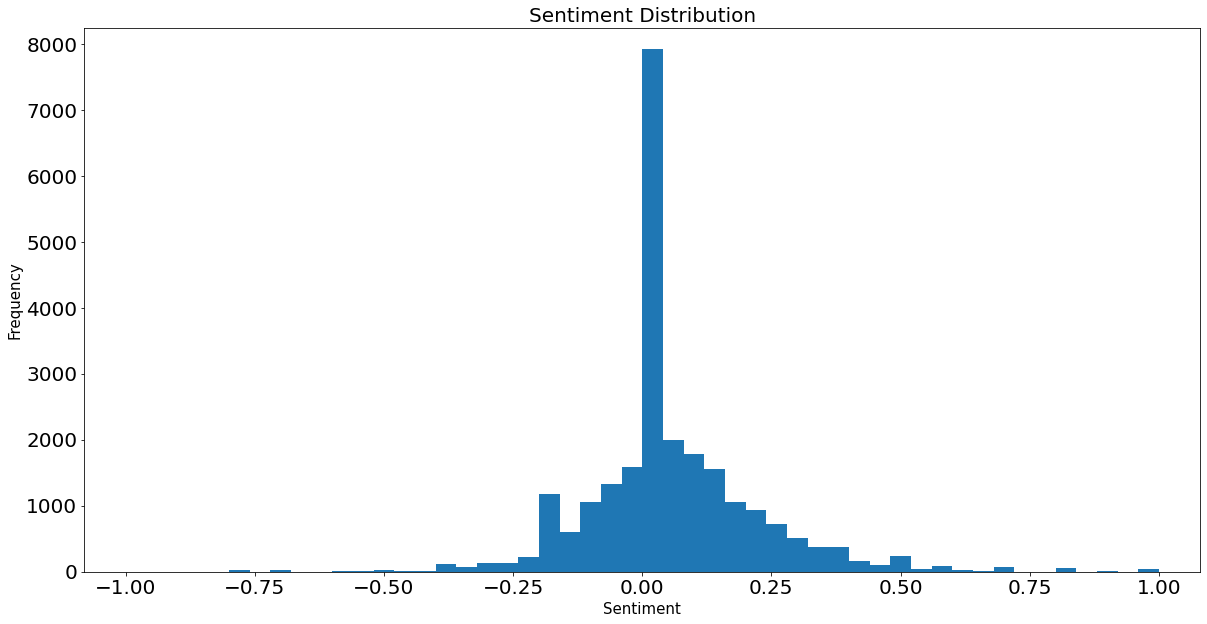

In [ ]:
plt.figure(figsize=(20,10))
plt.margins(0.04)
plt.xlabel('Sentiment', fontsize=15)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=20)
plt.hist(data['senti_polar'], bins=50)
plt.title('Sentiment Distribution', fontsize=20)
plt.show()

The above histogram is skewed to towards posivtive polarity as we know there are more Non abusive mails than abusive mails
in our data.

#### Histogram for Sentiment polarity range for Abusive and Non Abusive emails.

Text(0, 0.5, 'No.of emails')

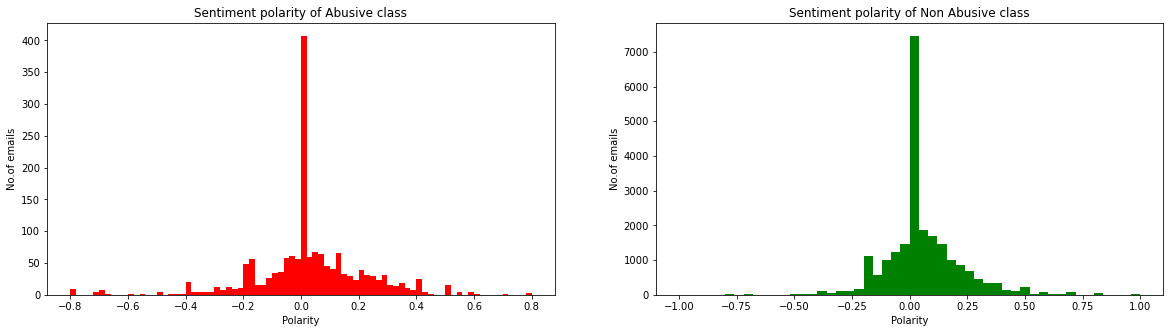

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(data_abusive['senti_polar'], bins=80,color='r',);
plt.title('Sentiment polarity of Abusive class')
plt.xlabel('Polarity')
plt.ylabel('No.of emails')
plt.subplot(1,2,2)
plt.hist(data_nonabusive['senti_polar'], bins=50,color='g');
plt.title('Sentiment polarity of Non Abusive class')
plt.xlabel('Polarity')
plt.ylabel('No.of emails')

### Wordcloud

In [ ]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
# Joining the list into one string/text
text = ' '.join(data['stp_rem_str'])

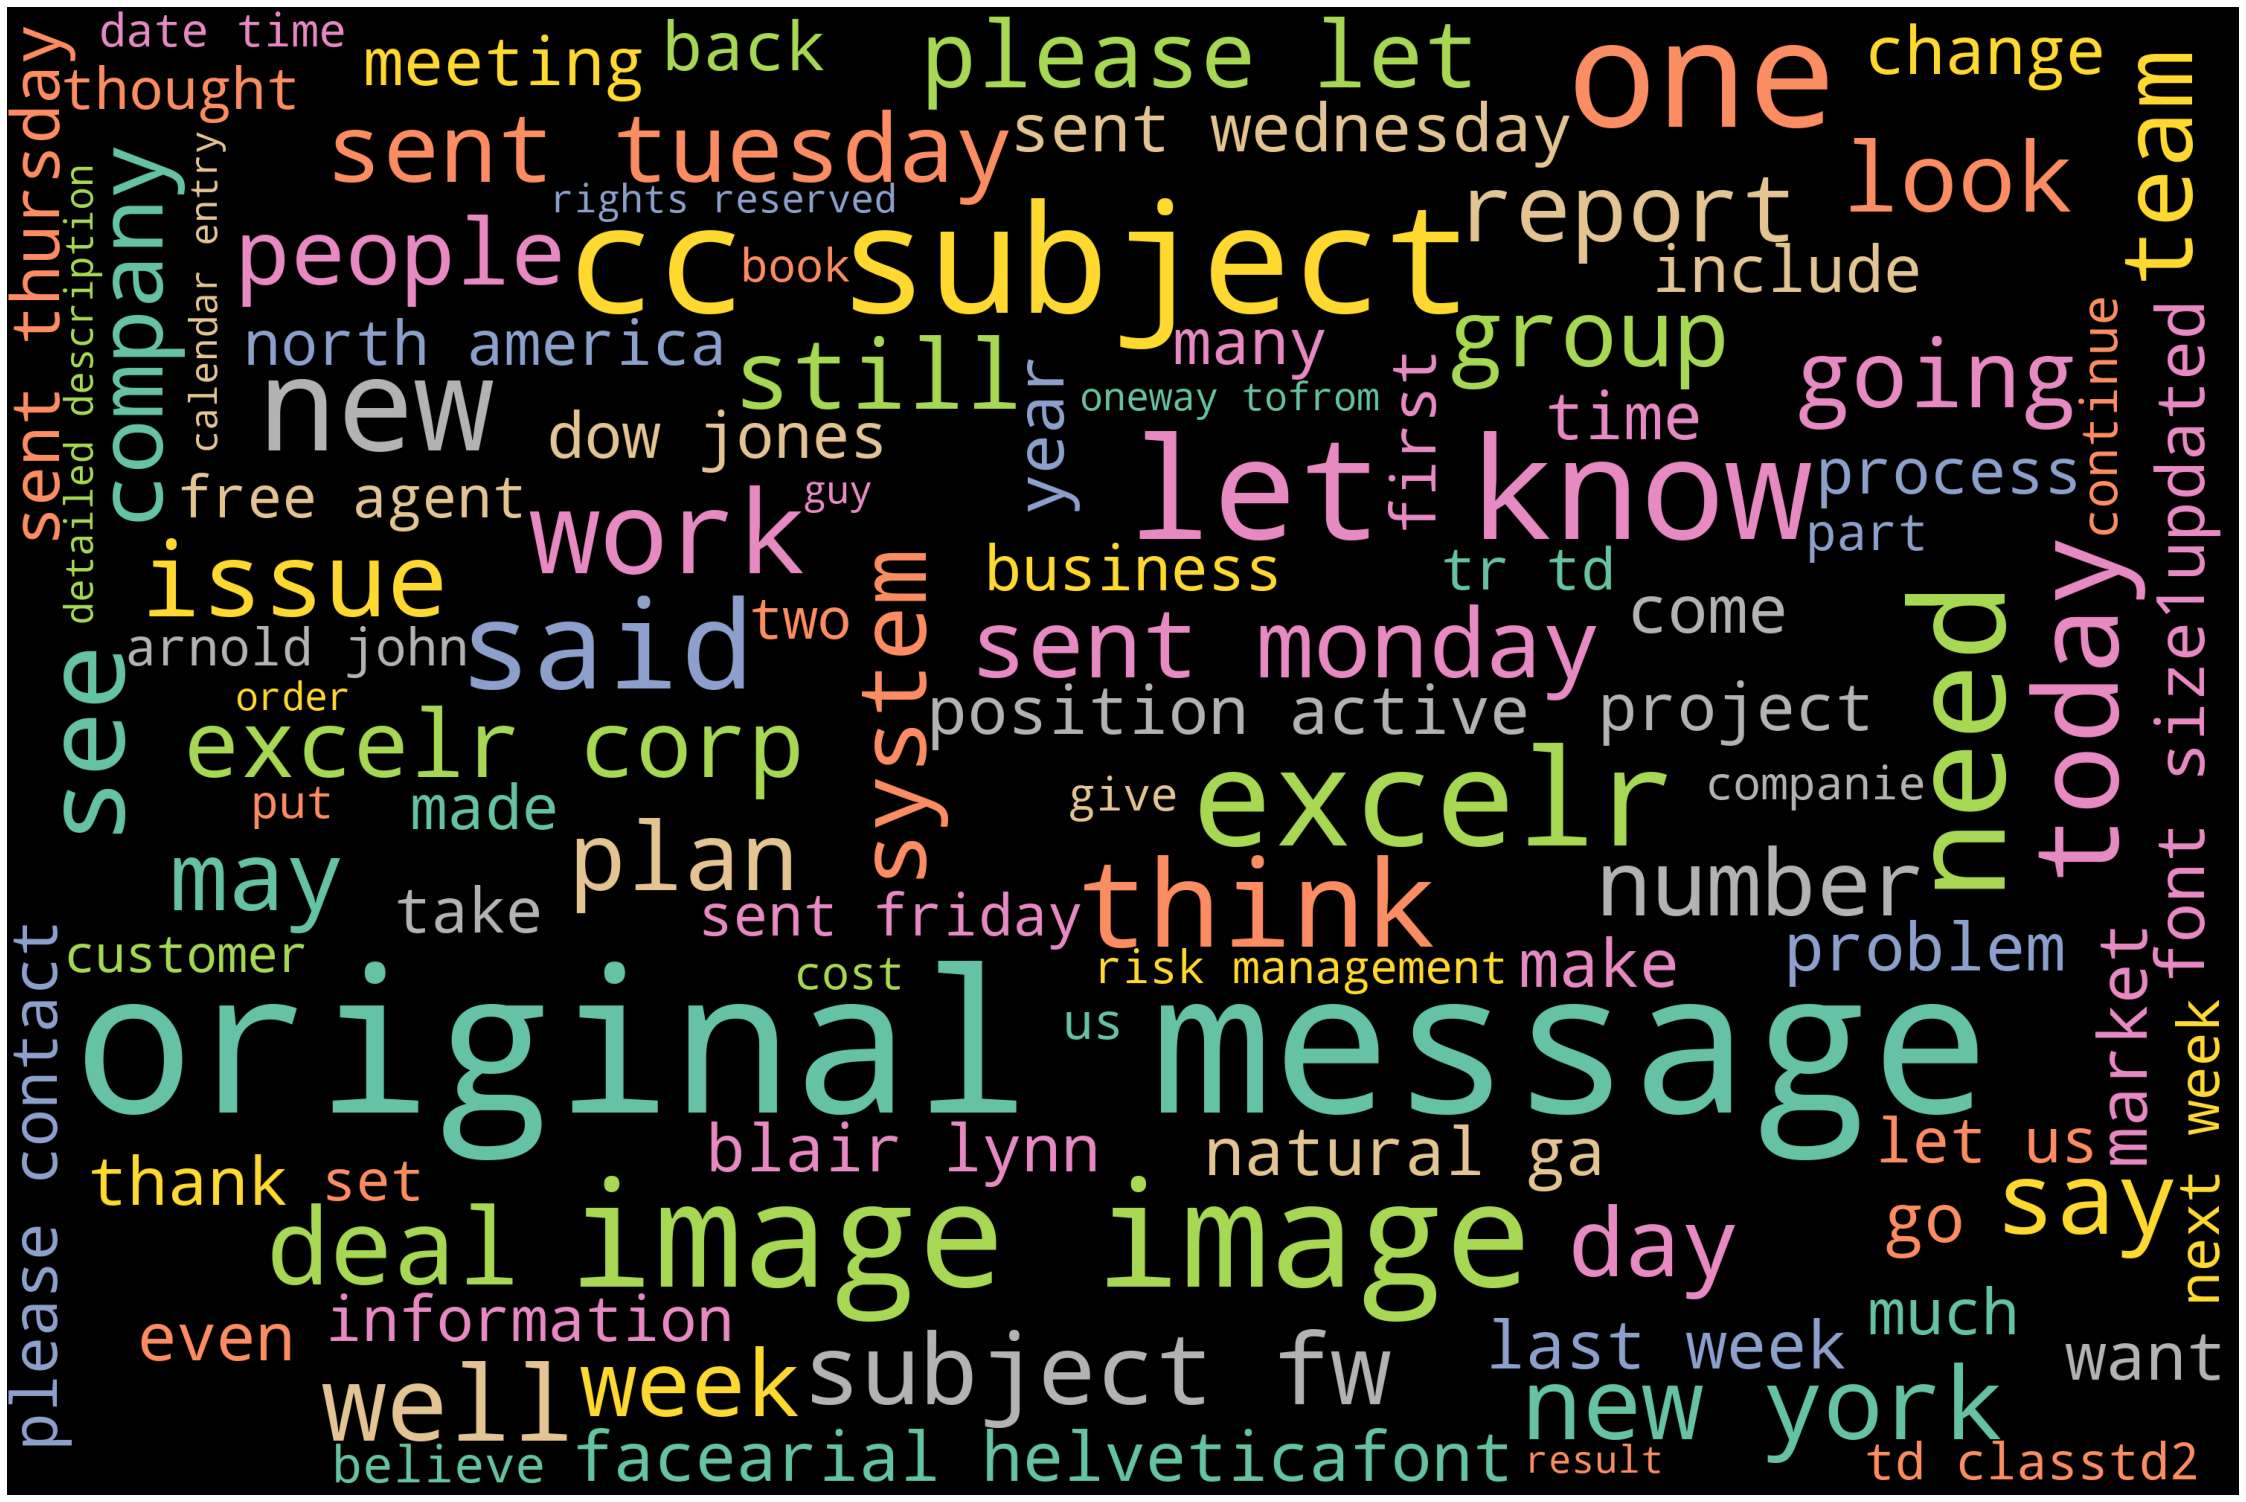

In [ ]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

#### Bargraph of Top 25 most used words in emails.

In [ ]:
email=np.array(data_nonabusive['cleaned'])
s=str(email)
nonabusive_toc = word_tokenize(s)
print(nonabusive_toc)

['[', "'forecast'", "'travel", 'busi', 'meet', 'take', 'fun', 'trip', 'especi', 'prepar', 'present', 'would', 'suggest', 'hold', 'busi', 'plan', 'meet', 'take', 'trip', 'without', 'formal', 'busi', 'meet', 'would', 'even', 'tri', 'get', 'honest', 'opinion', 'whether', 'trip', 'even', 'desir', 'necessari', 'far', 'busi', 'meet', 'think', 'would', 'product', 'tri', 'stimul', 'discus', 'across', 'differ', 'group', 'work', 'often', 'present', 'speak', 'other', 'quiet', 'wait', 'turn', 'meet', 'might', 'better', 'held', 'round', 'tabl', 'discus', 'format', 'suggest', 'go', 'austin', 'play', 'golf', 'rent', 'ski', 'boat', 'jet', 'ski', 'fli', 'somewher', 'take', 'much', "time'", "'test", 'success', 'way', 'go', "'", '...', "'imageimageimag", 'dear', 'smartremind', 'member', 'imag', 'franchoic', 'free', 'oneonon', 'consult', 'servic', 'peopl', 'look', 'purchas', 'franchis', 'busi', 'help', 'hundr', 'new', 'entrepreneur', 'save', 'time', 'research', 'right', 'opportun', 'discov', 'prescreen', 

In [ ]:
email_abusive=np.array(data_abusive['cleaned'])
s=str(email_abusive)
abusive_toc = word_tokenize(s)
print(abusive_toc)

['[', "'eat", 'shit', 'john', 'j', 'lavoratoexcelr', 'pm', 'john', 'arnoldhouectect', 'cc', 'subject', 'footbal', 'bet', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack', "'", "'fuck'", "'gentleman", 'follow', 'champagn', 'avail', 'approxim', 'retail', 'price', 'also', 'interest', 'trade', 'red', 'wine', 'retail', 'price', 'deriv', 'spec', 'websit', 'winesearcercom', 'wine', 'store', 'temperatur', 'control', 'privat', 'wine', 'storag', 'facil', 'quan', 'vintag', 'wine', 'retail', 'perrier', 'jouet', 'brut', 'fleur', 'de', 'champagn', 'piper', 'heidsek', 'reserv', 'dom', 'perignon', 'veuv', 'cliquot', 'ponsardin', 'la', 'grand', 'dame', 'taitteng', 'millesin', 'brut', 'jacquart', 'millesin', 'roeder', 'cristal', "interest'", '...', "'lot", 'confus', 'bullshit', 'float', "around'", "'wow", 'three', 'week', 'away', 'kid', 'brave', 'lucki', 'man', 'life', 'edgi', 'wait', 'stupid', 'auction', 'happen', 'realli', 'know', 'thing', 'look', 'like', 'even', 'get', '

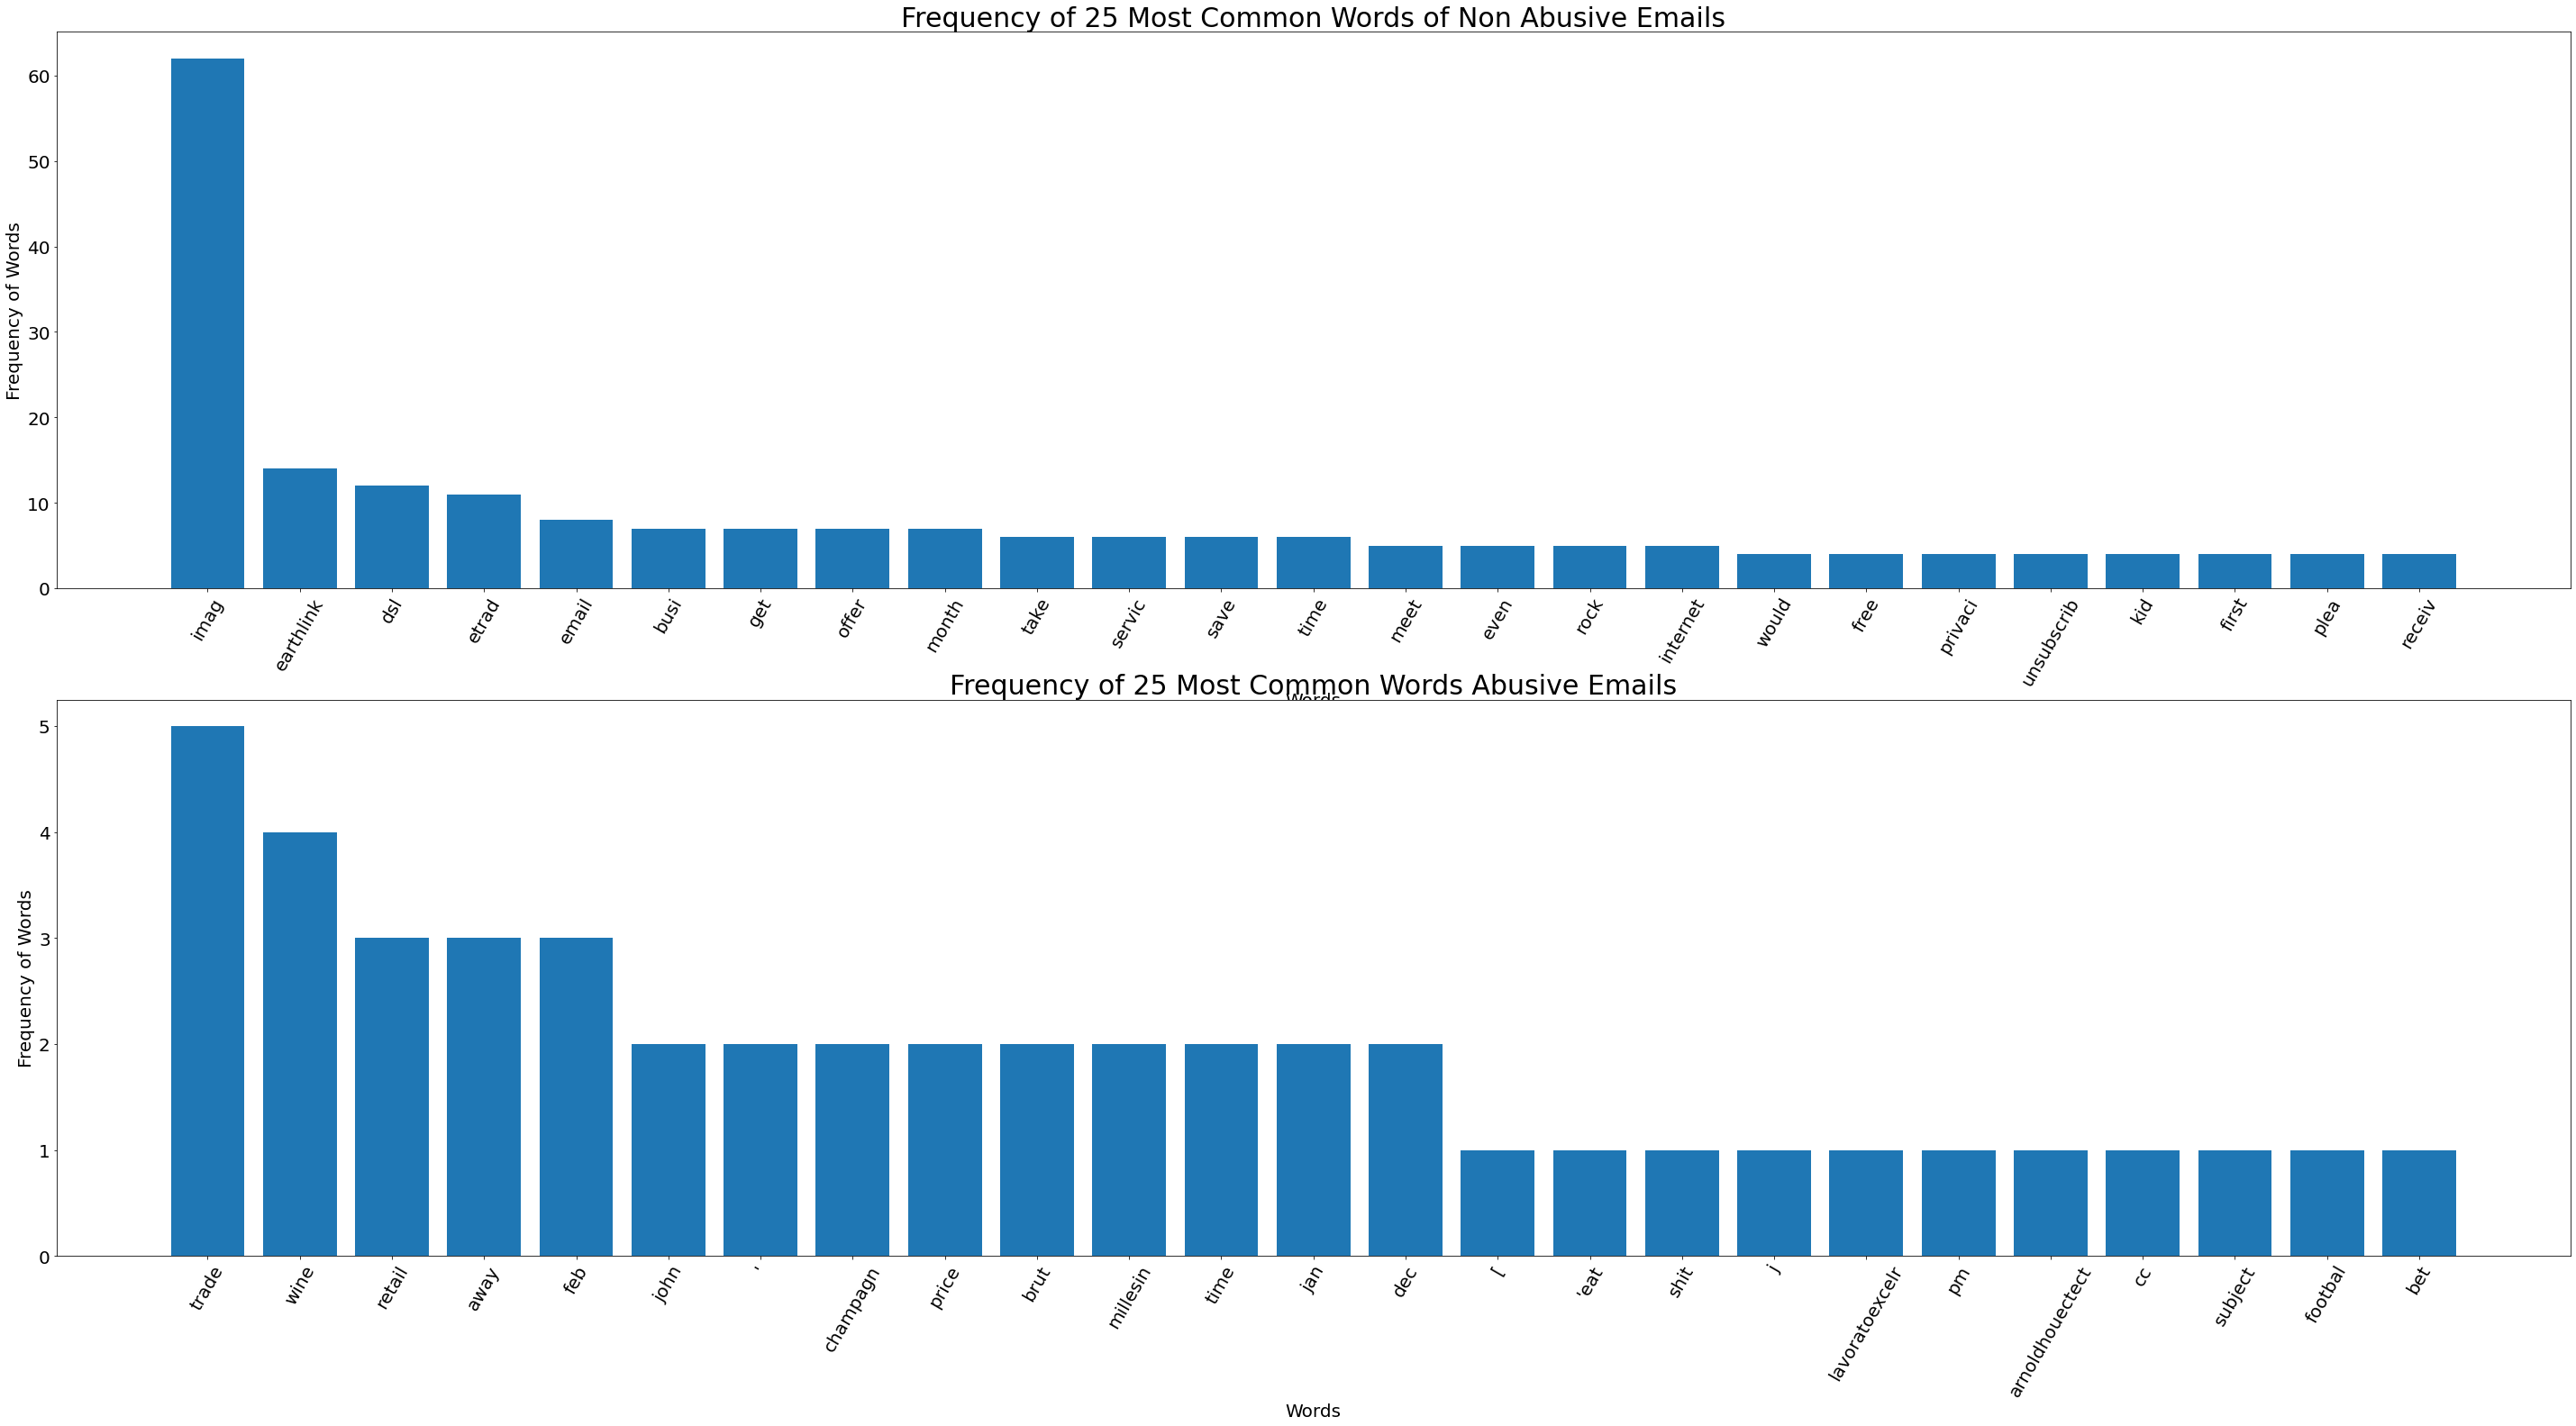

In [ ]:
from nltk.probability import FreqDist
mostcommon_1 = FreqDist(nonabusive_toc).most_common(25)
x, y = zip(*mostcommon_1)
mostcommon_2 =FreqDist(abusive_toc).most_common(25)
x1, y1 = zip(*mostcommon_2)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.subplot(2,1,1)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words of Non Abusive Emails', fontsize=30)
plt.subplot(2,1,2)
plt.bar(x1, y1)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=20)
plt.title('Frequency of 25 Most Common Words Abusive Emails', fontsize=30)
plt.show()

In [ ]:
# Top 25 words in all the emails in our data

In [ ]:
email_all=np.array(data['cleaned'])
s=str(email_all)
all_toc = word_tokenize(s)
print(all_toc)

['[', "'eat", 'shit', 'john', 'j', 'lavoratoexcelr', 'pm', 'john', 'arnoldhouectect', 'cc', 'subject', 'footbal', 'bet', 'minn', 'buff', 'phil', 'indi', 'cinnci', 'det', 'clev', 'den', 'dall', 'jack', "'", "'fuck'", "'gentleman", 'follow', 'champagn', 'avail', 'approxim', 'retail', 'price', 'also', 'interest', 'trade', 'red', 'wine', 'retail', 'price', 'deriv', 'spec', 'websit', 'winesearcercom', 'wine', 'store', 'temperatur', 'control', 'privat', 'wine', 'storag', 'facil', 'quan', 'vintag', 'wine', 'retail', 'perrier', 'jouet', 'brut', 'fleur', 'de', 'champagn', 'piper', 'heidsek', 'reserv', 'dom', 'perignon', 'veuv', 'cliquot', 'ponsardin', 'la', 'grand', 'dame', 'taitteng', 'millesin', 'brut', 'jacquart', 'millesin', 'roeder', 'cristal', "interest'", '...', "'imageimageimag", 'dear', 'smartremind', 'member', 'imag', 'franchoic', 'free', 'oneonon', 'consult', 'servic', 'peopl', 'look', 'purchas', 'franchis', 'busi', 'help', 'hundr', 'new', 'entrepreneur', 'save', 'time', 'research', 

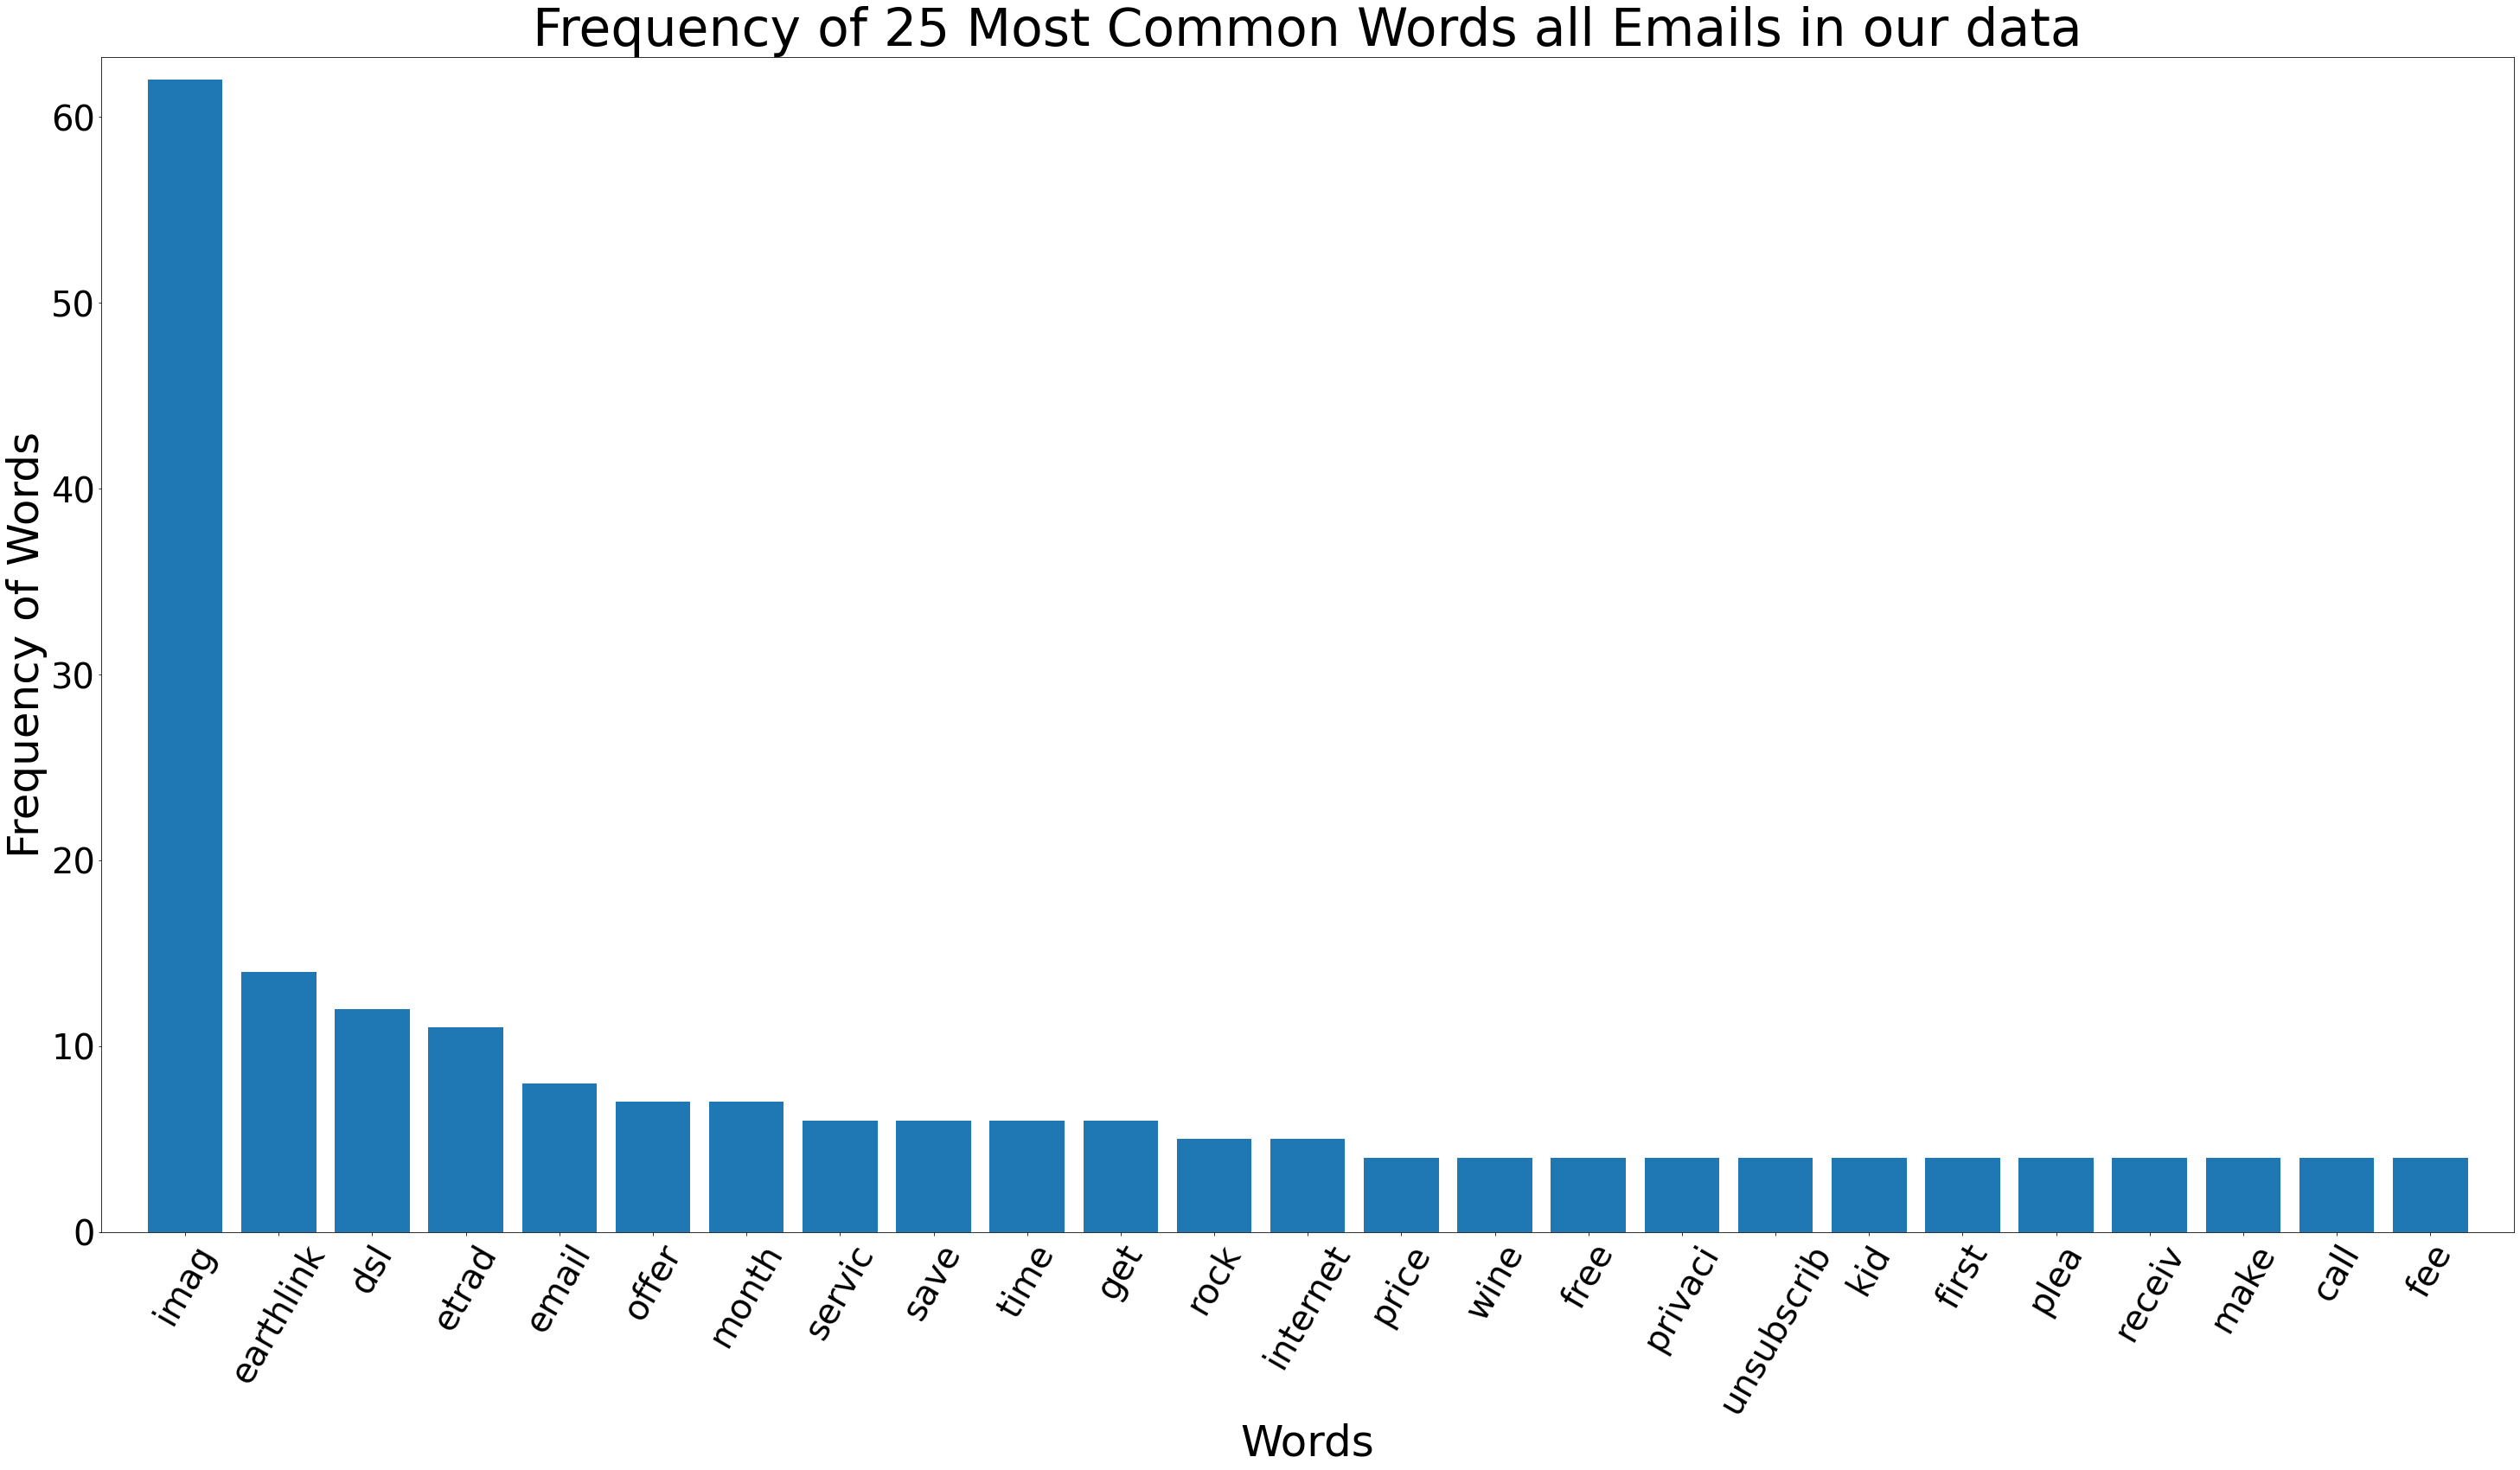

In [ ]:
mostcommon_all = FreqDist(all_toc).most_common(25)
x_all, y_all = zip(*mostcommon_all)
plt.figure(figsize=(50,25))
plt.margins(0.02)
plt.bar(x_all, y_all)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words all Emails in our data', fontsize=60)
plt.show()

#### Bi-Gram Chart

In [ ]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
# Top 20 Bi-gram words
top2_words = get_top_n2_words(data["cleaned"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(30)

,Bi-gram,Freq
0,origin messag,9353
1,imag imag,4845
2,cc subject,4827
3,let know,4696
4,would like,3217
5,new york,2113
6,subject fw,2039
7,tr td,2016
8,sent monday,1951
9,font faceari,1918


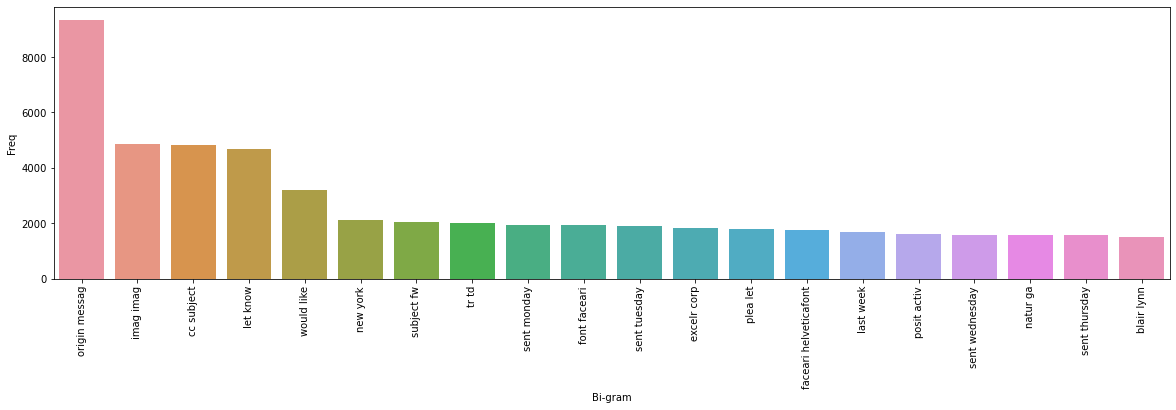

In [ ]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

#### Tri-Gram Chart

In [ ]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [ ]:
top3_words = get_top_n3_words(data["cleaned"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [ ]:
# Top 20 Tri gram words
top3_df.head(30)

,Tri-gram,Freq
0,imag imag imag,3108
1,plea let know,1670
2,font faceari helveticafont,1642
3,central standard time,1093
4,outlook migrat team,1063
5,calendar entri appoint,1052
6,entri appoint descript,1052
7,excelr north america,1030
8,chairperson outlook migrat,1030
9,migrat team detail,1030


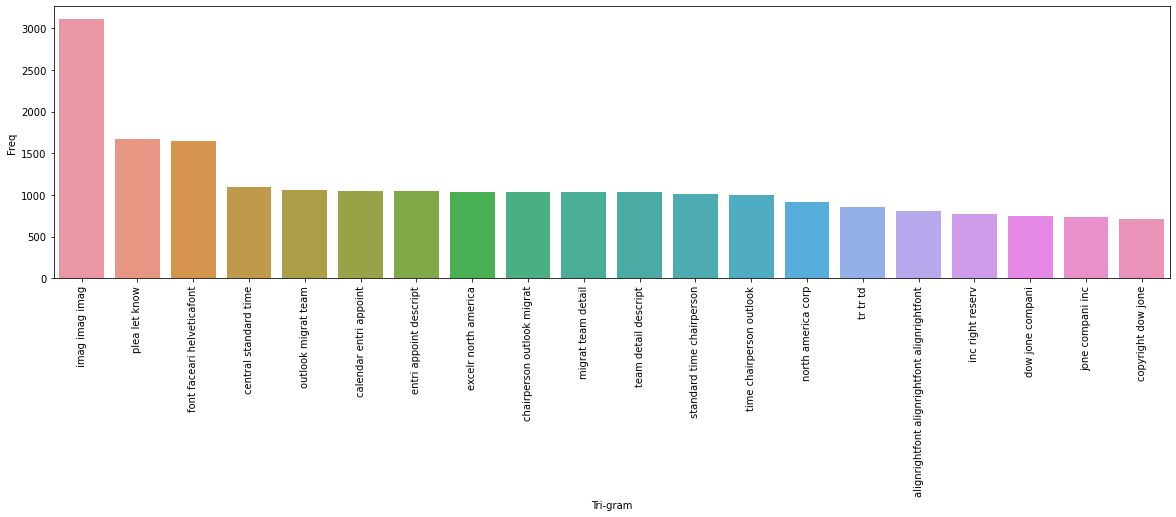

In [ ]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [ ]:
d=data[['cleaned','Class']]
d

,cleaned,Class
0,eat shit john j lavoratoexcelr pm john arnoldhouectect cc subject footbal bet minn buff phi...,Abusive
1,fuck,Abusive
2,gentleman follow champagn avail approxim retail price also interest trade red wine retail price...,Abusive
3,sorri ive taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr comm...,Abusive
4,asshol john j lavoratoexcelr john arnoldhouectect cc subject john seem make gambl problem go a...,Abusive
...,...,...
47974,need new lead busi need increas internet exposur thousand join internet daili ever sinc reach t...,Non Abusive
47975,imag imag imag garth brook wrap imag imag win ticket trip garth brook show hey launcher week cou...,Non Abusive
47977,imageimageimag dear smartremind member imag franchoic free oneonon consult servic peopl look pur...,Non Abusive
47980,imag imag imag imag kid rock forev imag offici kid rock site wwwkidrockcom time get cocki hey la...,Non Abusive


### Feature Extraction

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\himan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import numpy as np
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
d

,cleaned,Class
0,eat shit john j lavoratoexcelr pm john arnoldhouectect cc subject footbal bet minn buff phi...,Abusive
1,fuck,Abusive
2,gentleman follow champagn avail approxim retail price also interest trade red wine retail price...,Abusive
3,sorri ive taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr comm...,Abusive
4,asshol john j lavoratoexcelr john arnoldhouectect cc subject john seem make gambl problem go a...,Abusive
...,...,...
47974,need new lead busi need increas internet exposur thousand join internet daili ever sinc reach t...,Non Abusive
47975,imag imag imag garth brook wrap imag imag win ticket trip garth brook show hey launcher week cou...,Non Abusive
47977,imageimageimag dear smartremind member imag franchoic free oneonon consult servic peopl look pur...,Non Abusive
47980,imag imag imag imag kid rock forev imag offici kid rock site wwwkidrockcom time get cocki hey la...,Non Abusive


In [ ]:
corpus = d['cleaned'].tolist()
corpus[:10]

['eat shit john j lavoratoexcelr   pm john arnoldhouectect cc subject footbal bet  minn  buff  phil  indi  cinnci  det  clev  den  dall  jack ',
 'fuck',
 'gentleman follow champagn avail  approxim retail price also interest trade red wine retail price deriv spec websit winesearcercom wine store temperatur control privat wine storag facil quan vintag wine retail   perrier jouet brut fleur de champagn    piper heidsek reserv    dom perignon    veuv cliquot ponsardin la grand dame    taitteng millesin brut    jacquart millesin    roeder cristal  interest',
 'sorri ive taken longjust tri fend chick life sooooo hard sometim monkey brian orourkeexcelr commun   john arnoldhouectect cc subject yeah monkey monkey hey littl bastard fuck pictur ecompani think help score woman say balanc sheet yeah monkey b',
 'asshol john j lavoratoexcelr   john arnoldhouectect cc subject john seem make gambl problem go away bill   denver   jack   ',
 'asshol john j lavoratoexcelr   john arnoldhouectect cc subje

#### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [ ]:
word_freq_df.sort_values('occurrences',ascending=False)

,term,occurrences,frequency
26843,excelr,21148,6.392504e-03
83008,subject,18240,5.513489e-03
67201,plea,17315,5.233885e-03
67318,pm,16050,4.851508e-03
86524,time,14945,4.517494e-03
...,...,...,...
44749,johannachiangyahoocom,1,3.022746e-07
44751,johannessen,1,3.022746e-07
44752,johans,1,3.022746e-07
44755,johansenpetrauska,1,3.022746e-07


#### TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=5000, max_df = 0.5, smooth_idf=True) #keep top 1000
doc_vec = vectorizer.fit_transform(corpus)
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
tf= pd.DataFrame(denselist, columns = names_features)
tf

,____,_____,__________________________________,__________________________________________________,___________________________________________________________,_________________________________________________________________,______________________________________________________________________________,aa,aaron,ab,...,zadow,zd,zdnet,zealand,zero,zhiyong,zima,zip,zipper,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24652,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24653,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24654,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Building

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pickle
from sklearn.metrics import f1_score,accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_df = tf.iloc[:,1:]
Y_df = d['Class']

#### Spliting the data into train and test

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X_df,Y_df, test_size=0.33,random_state=0)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((16519, 4999), (16519,), (8137, 4999), (8137,))

#### Balancing the splited data using SMOTE method

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train1,y_train1=smt.fit_resample(x_train,y_train)
x_test1,y_test1=smt.fit_resample(x_test,y_test)

## Logistic Regression

### Logistic Regression Using Default data

In [ ]:
classifier = LogisticRegression(max_iter=2000)
classifier.fit(x_train , y_train)

LogisticRegression(max_iter=2000)

In [ ]:
log_pred_test = classifier.predict(x_test)
log_pred_train=classifier.predict(x_train)

In [ ]:
acc_log_train=accuracy_score(y_train,log_pred_train)*100
acc_log_test = accuracy_score(y_test, log_pred_test) * 100
print('Accuracy of Training data =',acc_log_train)
print("Accuracy of Test data =", acc_log_test)

Accuracy of Training data = 97.14268418185121
Accuracy of Test data = 96.19024210396952


In [ ]:
print(classification_report(y_test,log_pred_test))

              precision    recall  f1-score   support

     Abusive       0.98      0.45      0.62       553
 Non Abusive       0.96      1.00      0.98      7584

    accuracy                           0.96      8137
   macro avg       0.97      0.72      0.80      8137
weighted avg       0.96      0.96      0.96      8137



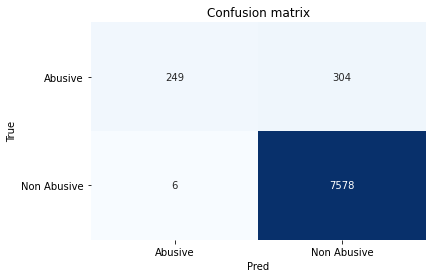

In [ ]:
from sklearn import metrics
classes = np.unique(y_test)
cm0 = metrics.confusion_matrix(y_test,log_pred_test)
fig, ax = plt.subplots()
sns.heatmap(cm0, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### Logistic Regression using balanced data

In [ ]:
classifier2 = LogisticRegression(max_iter=2000)
classifier2.fit(x_train1 , y_train1)

LogisticRegression(max_iter=2000)

In [ ]:
log_pred2_test = classifier.predict(x_test1)
log_pred2_train=classifier.predict(x_train1)

In [ ]:
acc2_log_train=accuracy_score(y_train1,log_pred2_train)*100
acc2_log_test = accuracy_score(y_test1, log_pred2_test) * 100
print('Accuracy of Training data =',acc2_log_train)
print("Accuracy of Test data =", acc2_log_test)

Accuracy of Training data = 75.44718081659106
Accuracy of Test data = 62.631856540084385


In [ ]:
print(classification_report(y_test1,log_pred2_test))

              precision    recall  f1-score   support

     Abusive       1.00      0.25      0.40      7584
 Non Abusive       0.57      1.00      0.73      7584

    accuracy                           0.63     15168
   macro avg       0.78      0.63      0.57     15168
weighted avg       0.78      0.63      0.57     15168



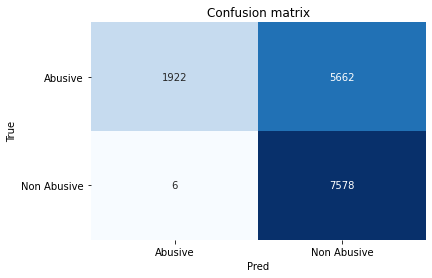

In [ ]:
classes = np.unique(y_test)
cm00 = metrics.confusion_matrix(y_test1,log_pred2_test)
fig, ax = plt.subplots()
sns.heatmap(cm00, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## Support Vector Machine

### SVM with default data using TFIDF

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import  cross_val_score

In [ ]:
model1=SVC()
model1.fit(x_train , y_train)
y_pred = model1.predict(x_test)

In [ ]:
y_prd_train=model1.predict(x_train)

In [ ]:
acc_svm_train=accuracy_score(y_train,y_prd_train)*100
acc_svm_test = accuracy_score(y_test, y_pred) * 100
print('Accuracy of Training data =',acc_svm_train)
print("Accuracy of Test data =", acc_svm_test)

Accuracy of Training data = 99.33410012712633
Accuracy of Test data = 97.22256359837777


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Abusive       0.97      0.61      0.75       553
 Non Abusive       0.97      1.00      0.99      7584

    accuracy                           0.97      8137
   macro avg       0.97      0.80      0.87      8137
weighted avg       0.97      0.97      0.97      8137



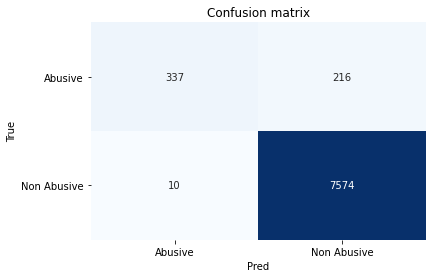

In [ ]:
classes = np.unique(y_test)
cm = metrics.confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### SVM with balanced data (by SMOTE method) using TFIDF

In [ ]:
model2=SVC()
model2.fit(x_train1 , y_train1)
y_pred2 = model2.predict(x_test1)

In [ ]:
y_prd_train1=model2.predict(x_train1)

In [ ]:
acc_svm_b_train=accuracy_score(y_train1,y_prd_train1)*100
acc_svm_b_test=accuracy_score(y_test1, y_pred2) * 100
print('Accuracy of Train data = ' ,acc_svm_b_train)
print('Accuracy of Test data =',acc_svm_b_test )

Accuracy of Train data =  99.38107582631238
Accuracy of Test data = 94.06645569620254


In [ ]:
print(classification_report(y_test1,y_pred2))

              precision    recall  f1-score   support

     Abusive       0.98      0.90      0.94      7584
 Non Abusive       0.90      0.99      0.94      7584

    accuracy                           0.94     15168
   macro avg       0.94      0.94      0.94     15168
weighted avg       0.94      0.94      0.94     15168



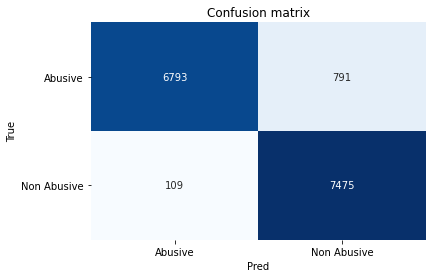

In [ ]:
cm2 = metrics.confusion_matrix(y_test1, y_pred2)
fig, ax = plt.subplots()
sns.heatmap(cm2, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## Naive Bayes Model

### Multinomial Navie Bayes model with default data

In [ ]:
from sklearn.naive_bayes import MultinomialNB as MB
NB_mb = MB()
NB_mb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
# Training accuracy

In [ ]:
train_pred_NB_mb = NB_mb.predict(x_train)
accuracy_train_NB_mb = accuracy_score(y_train,train_pred_NB_mb)*100
accuracy_train_NB_mb

95.99249349234216

In [ ]:
# Test accuracy

In [ ]:
test_pred_NB_mb = NB_mb.predict(x_test)
accuracy_test_NB_mb = accuracy_score(y_test,test_pred_NB_mb)*100
accuracy_test_NB_mb

95.26852648396215

In [ ]:
print(classification_report(y_test,test_pred_NB_mb))

              precision    recall  f1-score   support

     Abusive       0.80      0.40      0.54       553
 Non Abusive       0.96      0.99      0.98      7584

    accuracy                           0.95      8137
   macro avg       0.88      0.70      0.76      8137
weighted avg       0.95      0.95      0.95      8137



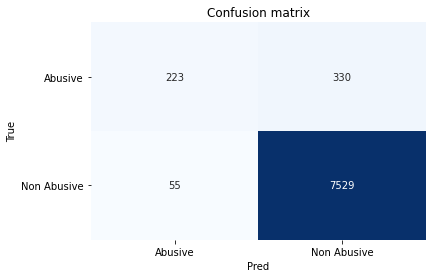

In [ ]:
cm3 = metrics.confusion_matrix(y_test,test_pred_NB_mb)
fig, ax = plt.subplots()
sns.heatmap(cm3, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### Multinomial Navie Bayes model with balanced data(by SMOTE method)

In [ ]:
NB_mb_b = MB()
NB_mb_b.fit(x_train1,y_train1)

MultinomialNB()

In [ ]:
train_pred_NB_mb_b = NB_mb_b.predict(x_train1)
accuracy_train_NB_mb_b = accuracy_score(y_train1,train_pred_NB_mb_b)*100
test_pred_NB_mb_b = NB_mb.predict(x_test1)
accuracy_test_NB_mb_b = accuracy_score(y_test1,test_pred_NB_mb_b)*100
print('Accuracy of NB train data =',accuracy_train_NB_mb_b)
print('Accuracy of NB test data=',accuracy_test_NB_mb_b)

Accuracy of NB train data = 92.40116655865198
Accuracy of NB test data= 61.15506329113924


In [ ]:
print(classification_report(y_test1,test_pred_NB_mb_b))

              precision    recall  f1-score   support

     Abusive       0.97      0.23      0.37      7584
 Non Abusive       0.56      0.99      0.72      7584

    accuracy                           0.61     15168
   macro avg       0.77      0.61      0.55     15168
weighted avg       0.77      0.61      0.55     15168



In [ ]:
confusion_matrix_NB_mb_b = confusion_matrix(y_test1,test_pred_NB_mb_b)
confusion_matrix_NB_mb_b

array([[1747, 5837],
       [  55, 7529]], dtype=int64)

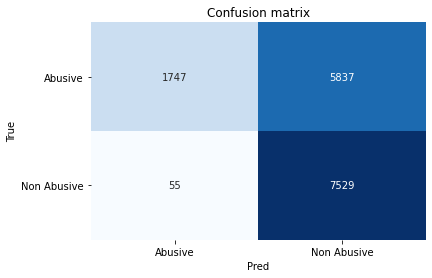

In [ ]:
cm4 = metrics.confusion_matrix(y_test1,test_pred_NB_mb_b)
fig, ax = plt.subplots()
sns.heatmap(cm4, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## Decision Tree

### Decision Tree with default data

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
model_tree=DecisionTreeClassifier()
model_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
train_pred_model_tree = model_tree.predict(x_train)
accuracy_train_model_tree = accuracy_score(y_train,train_pred_model_tree)*100
accuracy_train_model_tree

99.97578545916824

In [ ]:
test_pred_model_tree = model_tree.predict(x_test)
accuracy_test_model_tree = accuracy_score(y_test,test_pred_model_tree)*100
accuracy_test_model_tree

96.46061201917169

In [ ]:
print(classification_report(y_test,test_pred_model_tree))

              precision    recall  f1-score   support

     Abusive       0.75      0.71      0.73       553
 Non Abusive       0.98      0.98      0.98      7584

    accuracy                           0.96      8137
   macro avg       0.87      0.85      0.86      8137
weighted avg       0.96      0.96      0.96      8137



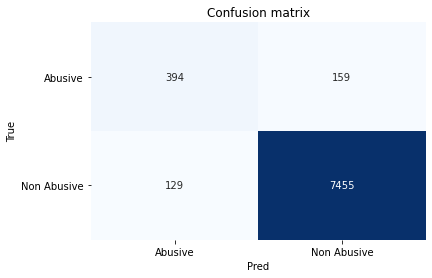

In [ ]:
cm4 = metrics.confusion_matrix(y_test,test_pred_model_tree)
fig, ax = plt.subplots()
sns.heatmap(cm4, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

### Decision Tree with balanced data

In [ ]:
model_tree2 = DecisionTreeClassifier()
model_tree2.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
train_pred_model_tree2 = model_tree.predict(x_train)
accuracy_train_model_tree2 = accuracy_score(y_train,train_pred_model_tree2)*100
accuracy_train_model_tree2

99.97578545916824

In [ ]:
test_pred_model_tree2 = model_tree.predict(x_test)
accuracy_test_model_tree2 = accuracy_score(y_test,test_pred_model_tree2)*100
accuracy_test_model_tree2

96.46061201917169

In [ ]:
print(classification_report(y_test,test_pred_model_tree2))

              precision    recall  f1-score   support

     Abusive       0.75      0.71      0.73       553
 Non Abusive       0.98      0.98      0.98      7584

    accuracy                           0.96      8137
   macro avg       0.87      0.85      0.86      8137
weighted avg       0.96      0.96      0.96      8137



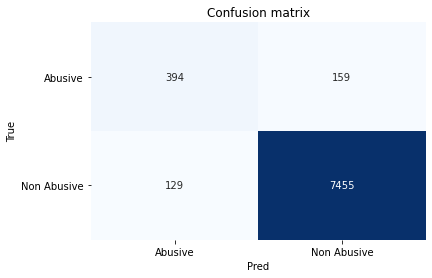

In [ ]:
cm4 = metrics.confusion_matrix(y_test,test_pred_model_tree2)
fig, ax = plt.subplots()
sns.heatmap(cm4, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0);

## Model Summary

In [ ]:
Summary={'Models':['Logistic Regression','Logistic Regression (Balance data)','SVM', 'SVM (Balance data)', 'Multinomial Naive Bayes', 'Multinomial Naive Bayes(Balance data)', 'Decision Tree with default data','Decision Tree with balanced data'],
    'Train Accuracy':[acc_log_train, acc2_log_train, acc_svm_train, acc_svm_b_train, accuracy_train_NB_mb, accuracy_train_NB_mb_b, accuracy_train_model_tree, accuracy_train_model_tree2]
    ,'Test Accuracy':[acc_log_test, acc2_log_test, acc_svm_test, acc_svm_b_test, accuracy_test_NB_mb, accuracy_test_NB_mb_b, accuracy_test_model_tree, accuracy_test_model_tree2]}

In [ ]:
Model_Acc=pd.DataFrame(Summary, index =[1,2,3,4,5,6,7,8])

In [ ]:
Model_Acc

,Models,Train Accuracy,Test Accuracy
1,Logistic Regression,97.142684,96.190242
2,Logistic Regression (Balance data),75.447181,62.631857
3,SVM,99.334100,97.222564
4,SVM (Balance data),99.381076,94.066456
5,Multinomial Naive Bayes,95.992493,95.268526
6,Multinomial Naive Bayes(Balance data),92.401167,61.155063
7,Decision Tree with default data,99.975785,96.460612
8,Decision Tree with balanced data,99.975785,96.460612


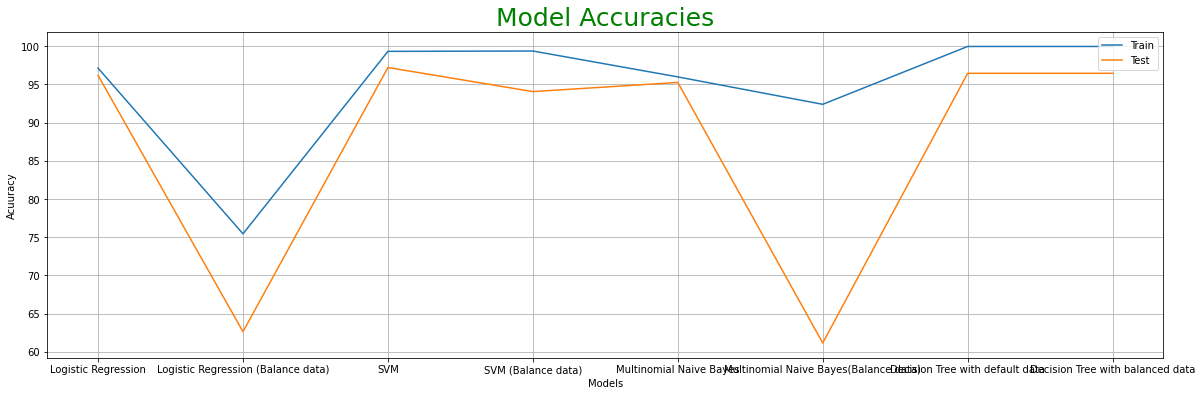

In [ ]:
plt.figure(figsize =(20, 6))
plt.plot(Model_Acc['Models'],Model_Acc['Train Accuracy'])
plt.plot(Model_Acc['Models'],Model_Acc['Test Accuracy'])
plt.title('Model Accuracies',fontdict={'fontsize': 25,'fontweight' : 15,'color' : 'g'})
plt.xlabel('Models')
plt.ylabel('Acuuracy')
plt.legend(['Train', 'Test'], loc='upper right')
plt.grid()
plt.show();
